<a href="https://colab.research.google.com/github/sba22203/master_thesis/blob/main/thesis_16_08_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

time series - prophet


In [ ]:
pip install prophet


In [ ]:
pip install pandas numpy prophet plotly


In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Load the dataset
data = pd.read_excel("ISEQ20_2years.xlsx")

preprocessing


In [ ]:
# Display basic statistics and information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       510 non-null    datetime64[ns]
 1   Open       510 non-null    float64       
 2   High       510 non-null    float64       
 3   Low        510 non-null    float64       
 4   Close      510 non-null    float64       
 5   Adj Close  510 non-null    float64       
 6   Volume     510 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 28.0 KB
None


In [ ]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean   1346.352512  1356.413665  1335.593724  1346.220976  1346.220976   
std     137.060005   135.423978   138.041085   136.906465   136.906465   
min    1070.060059  1084.430054  1054.060059  1063.239990  1063.239990   
25%    1231.402527  1243.572540  1219.414978  1227.999970  1227.999970   
50%    1385.534973  1395.670044  1371.364990  1381.984985  1381.984985   
75%    1471.414978  1477.984985  1462.752502  1469.257507  1469.257507   
max    1556.859985  1558.890015  1539.959961  1545.069946  1545.069946   

             Volume  
count  5.100000e+02  
mean   1.285721e+07  
std    1.690836e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.277430e+07  
75%    1.800072e+07  
max    1.701940e+08  


In [ ]:
# Handling Missing Values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Convert 'date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

EDA

In [ ]:
import plotly.express as px

fig = px.line(data, x='Date', y='Close', title='ISEQ 20 Closing Prices from 11/08/2021 to 11/08/2023', labels={'ds': 'Date', 'y': 'Closing Price'})
fig.update_layout(showlegend=True, xaxis=dict(showgrid=True), yaxis=dict(showgrid=True))
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load the Excel file and process the data
df = pd.read_excel("ISEQ20_2years.xlsx")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Reshape the DataFrame using pd.melt()
melted_df = pd.melt(df, id_vars=["Month"], value_vars=["Close"], value_name="Close Price")

# Create the box plot
box_plot = px.box(melted_df, x="Month", y="Close Price",
                  labels={"Month": "Month", "Close Price": "Close Price"},
                  title="Box Plots: Monthly Close Prices of ISEQ 20")

# Show the plot
box_plot.show()



In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)


# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Perform decomposition
iseq20_decomposition = sm.tsa.seasonal_decompose(data['ISEQ20'], model='additive')


# Create a new DataFrame with decomposed components
decomposed_data = pd.DataFrame({
    'ISEQ20_trend': iseq20_decomposition.trend,
    'ISEQ20_seasonal': iseq20_decomposition.seasonal,
    'ISEQ20_residual': iseq20_decomposition.resid,
}, index=data.index)

# Create a Seasonal Subseries Plot using Plotly
fig = px.line(decomposed_data, x=decomposed_data.index, y=['ISEQ20_seasonal'],
              title="Seasonal Subseries Plot for ISEQ20 Seasonal Components",
              labels={'value': 'Seasonal Component', 'index': 'Date'})

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Perform time series decomposition
iseq20_decomposition = seasonal_decompose(data['ISEQ20'], model='additive', period=30)  # Adjust period as needed


# Create subplots for observed, trend, seasonal, and residual components using Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=("Observed", "Trend", "Seasonal", "Residual"))

# Add traces for each component
fig.add_trace(go.Scatter(x=data.index, y=data['ISEQ20'], mode='lines', name='ISEQ20'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.trend, mode='lines', name='Trend'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.seasonal, mode='lines', name='Seasonal'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.resid, mode='lines', name='Residual'),
              row=4, col=1)

# Update layout
fig.update_layout(title="Time Series Decomposition for ISEQ20",
                  xaxis_title="Date")

# Show the plot
fig.show()

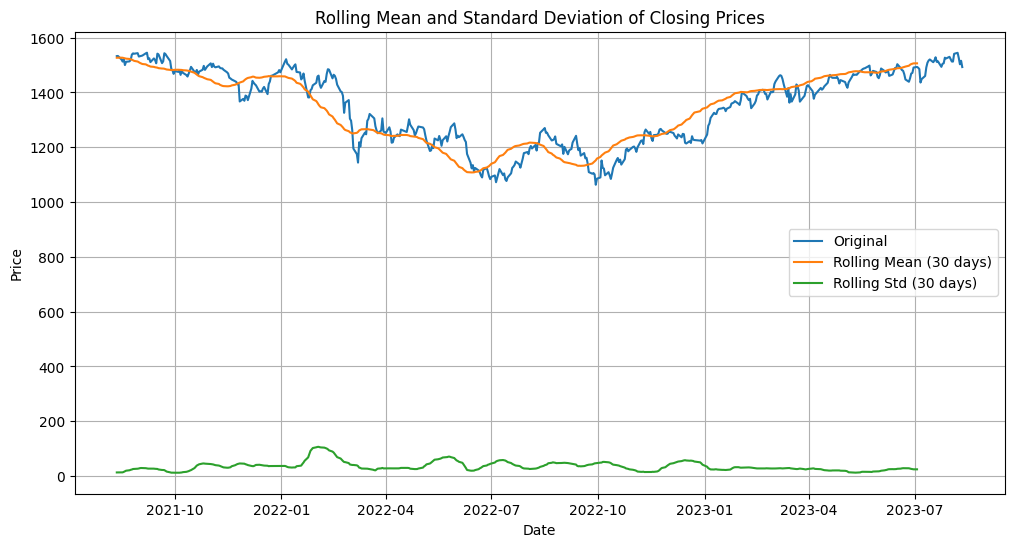

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel("ISEQ20_2years.xlsx")

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Rolling mean and standard deviation of 'Close' prices
plt.figure(figsize=(12, 6))
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()
plt.plot(data.index, data['Close'], label='Original')
plt.plot(data.index, rolling_mean, label='Rolling Mean (30 days)')
plt.plot(data.index, rolling_std, label='Rolling Std (30 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rolling Mean and Standard Deviation of Closing Prices')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Calculate Simple Moving Average (SMA) with window size of 10
sma_window = 10
iseq20_sma = data['ISEQ20'].rolling(window=sma_window).mean()

# Calculate Expanding Moving Average
iseq20_ema = data['ISEQ20'].expanding().mean()

# Calculate Exponentially Weighted Moving Average (EWMA)
alpha = 0.2  # Smoothing factor
iseq20_ewma = data['ISEQ20'].ewm(alpha=alpha, adjust=False).mean()

# Create a plot for moving averages using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=data.index, y=data['ISEQ20'], mode='lines', name='ISEQ20'))

# Simple Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_sma, mode='lines', name=f'ISEQ20 SMA ({sma_window})'))

# Expanding Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_ema, mode='lines', name='ISEQ20 Expanding MA'))

# Exponentially Weighted Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_ewma, mode='lines', name=f'ISEQ20 EWMA (alpha={alpha})'))

# Update layout
fig.update_layout(title="Moving Averages",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': iseq20_data})

# Assuming your data has a datetime index
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Fit Double Exponential Smoothing model for ISEQ20
iseq20_model = ExponentialSmoothing(data['ISEQ20'], trend='add', seasonal='add', seasonal_periods=7)
iseq20_fit = iseq20_model.fit()


# Forecast for the next 7 days
forecast_steps = 7
iseq20_forecast = iseq20_fit.forecast(steps=forecast_steps)

# Create a plot for Double Exponential Smoothing using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=data.index, y=data['ISEQ20'], mode='lines', name='ISEQ20'))

# Fitted values
fig.add_trace(go.Scatter(x=data.index, y=iseq20_fit.fittedvalues, mode='lines', name='ISEQ20 Fitted'))

# Forecasted values
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # Start from the next day
fig.add_trace(go.Scatter(x=forecast_index, y=iseq20_forecast, mode='lines', name='ISEQ20 Forecast'))

# Update layout
fig.update_layout(title="Double Exponential Smoothing",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()

# **prophet model - times series**

In [ ]:
# Load the dataset
data = pd.read_excel('ISEQ20_2years.xlsx')

In [ ]:
pip install pandas numpy matplotlib pystan prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go

# Read the dataset
df = pd.read_excel("ISEQ20_2years.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Create a detailed Plotly figure for the forecast
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))
# Add forecasted values trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))

# Customize layout
fig.update_layout(
    title='Actual and Forecasted Close Values',
    xaxis_title='Date',
    yaxis_title='Close Value',
    hovermode='x',  # Show hover information only for the closest data point along the x-axis
    template='plotly',  # Use the "plotly" template for a cleaner look
    legend=dict(x=0.02, y=0.98),  # Position the legend
    margin=dict(l=0, r=0, t=50, b=0)  # Add margin for the title
)

# Add hover text
hover_text = ["Actual: {:.2f}".format(y) if idx < len(df) else "Forecast: {:.2f}".format(y)
              for idx, y in enumerate(list(df['y']) + list(forecast['yhat']))]
fig.update_traces(text=hover_text, hoverinfo='text+y')

# Show the plot
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48cpon4w/8viv7my0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48cpon4w/0xz7jnnt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84246', 'data', 'file=/tmp/tmp48cpon4w/8viv7my0.json', 'init=/tmp/tmp48cpon4w/0xz7jnnt.json', 'output', 'file=/tmp/tmp48cpon4w/prophet_modelosnihzjj/prophet_model-20230816050513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:05:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:05:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Confirm to use hyperparameters

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go

# Read the dataset
df = pd.read_excel("ISEQ20_2years.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Create a detailed Plotly figure for the forecast with confidence intervals
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Add forecasted values trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))

# Add upper and lower confidence interval traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill=None, mode='lines', line=dict(color='rgba(255, 165, 0, 0.3)'), name='Upper Confidence Interval'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='lines', line=dict(color='rgba(255, 165, 0, 0.3)'), name='Lower Confidence Interval'))

# Customize layout
fig.update_layout(
    title='Actual and Forecasted Close Values with Confidence Intervals',
    xaxis_title='Date',
    yaxis_title='Close Value',
    hovermode='x',  # Show hover information only for the closest data point along the x-axis
    template='plotly',  # Use the "plotly" template for a cleaner look
    legend=dict(x=0.02, y=0.98),  # Position the legend
    margin=dict(l=0, r=0, t=50, b=0)  # Add margin for the title
)

# Add hover text
hover_text = ["Actual: {:.2f}".format(y) if idx < len(df) else "Forecast: {:.2f}".format(y)
              for idx, y in enumerate(list(df['y']) + list(forecast['yhat']))]
fig.update_traces(text=hover_text, hoverinfo='text+y')

# Show the plot
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48cpon4w/nua_blq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48cpon4w/s_k94n2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8330', 'data', 'file=/tmp/tmp48cpon4w/nua_blq3.json', 'init=/tmp/tmp48cpon4w/s_k94n2t.json', 'output', 'file=/tmp/tmp48cpon4w/prophet_modeluku_x1w_/prophet_model-20230816050514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# performance metrics

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Read the dataset
df = pd.read_excel("ISEQ20_2years.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['y'], forecast['yhat'][:len(df)])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['y'], forecast['yhat'][:len(df)])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df['y'] - forecast['yhat'][:len(df)]) / df['y'])) * 100

# Calculate R-squared (R2)
y_actual = df['y']
y_forecasted = forecast['yhat'][:len(df)]
y_mean = np.mean(y_actual)
ss_residual = np.sum((y_actual - y_forecasted) ** 2)
ss_total = np.sum((y_actual - y_mean) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Create a table comparing performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'Mean Absolute Percentage Error (MAPE)', 'R-squared (R2)'],
    'Value': [mae, mse, rmse, mape, r2]
})

print(performance_metrics)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48cpon4w/a92jw93h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48cpon4w/wx12a1g5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93682', 'data', 'file=/tmp/tmp48cpon4w/a92jw93h.json', 'init=/tmp/tmp48cpon4w/wx12a1g5.json', 'output', 'file=/tmp/tmp48cpon4w/prophet_modelsxmnqyhj/prophet_model-20230816050515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:05:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                                  Metric        Value
0              Mean Absolute Error (MAE)    33.825534
1               Mean Squared Error (MSE)  1968.861523
2         Root Mean Squared Error (RMSE)    44.371855
3  Mean Absolute Percentage Error (MAPE)     2.608100
4                         R-squared (R2)     0.894751


#**comparision ISEQ20 to other indices**



In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Load each dataset
datasets = [
    "BEL20_2years.xlsx",
    "FTSE100_2years.xlsx",
    "CAC40_2years.xlsx",
    "ISEQ20_2years.xlsx",
    "DAX40_2years.xlsx",
    "PSI20_2years.xlsx",
]

dataframes = [pd.read_excel(dataset) for dataset in datasets]

In [ ]:
# Assuming all dataframes have the same structure with 'Date' and 'Close' columns
combined_df = pd.concat([df.set_index('Date')['Close'] for df in dataframes], axis=1)
combined_df.columns = datasets


In [ ]:
fig = px.line(combined_df, x=combined_df.index, y=combined_df.columns, title='Close Prices of Different Indices')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')
fig.show()


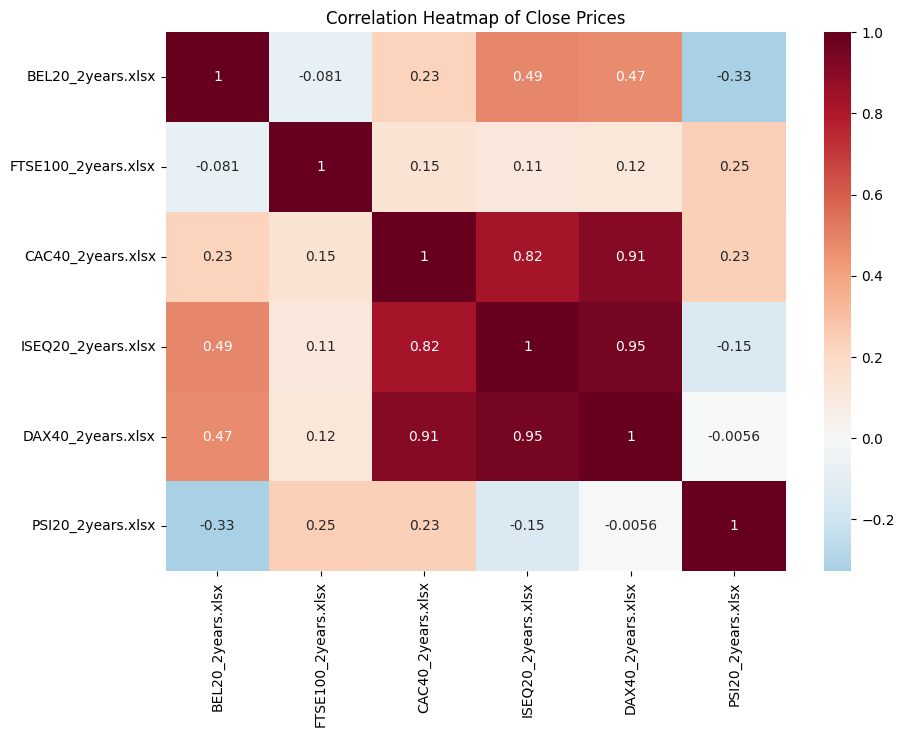

In [ ]:
# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Close Prices')
plt.show()

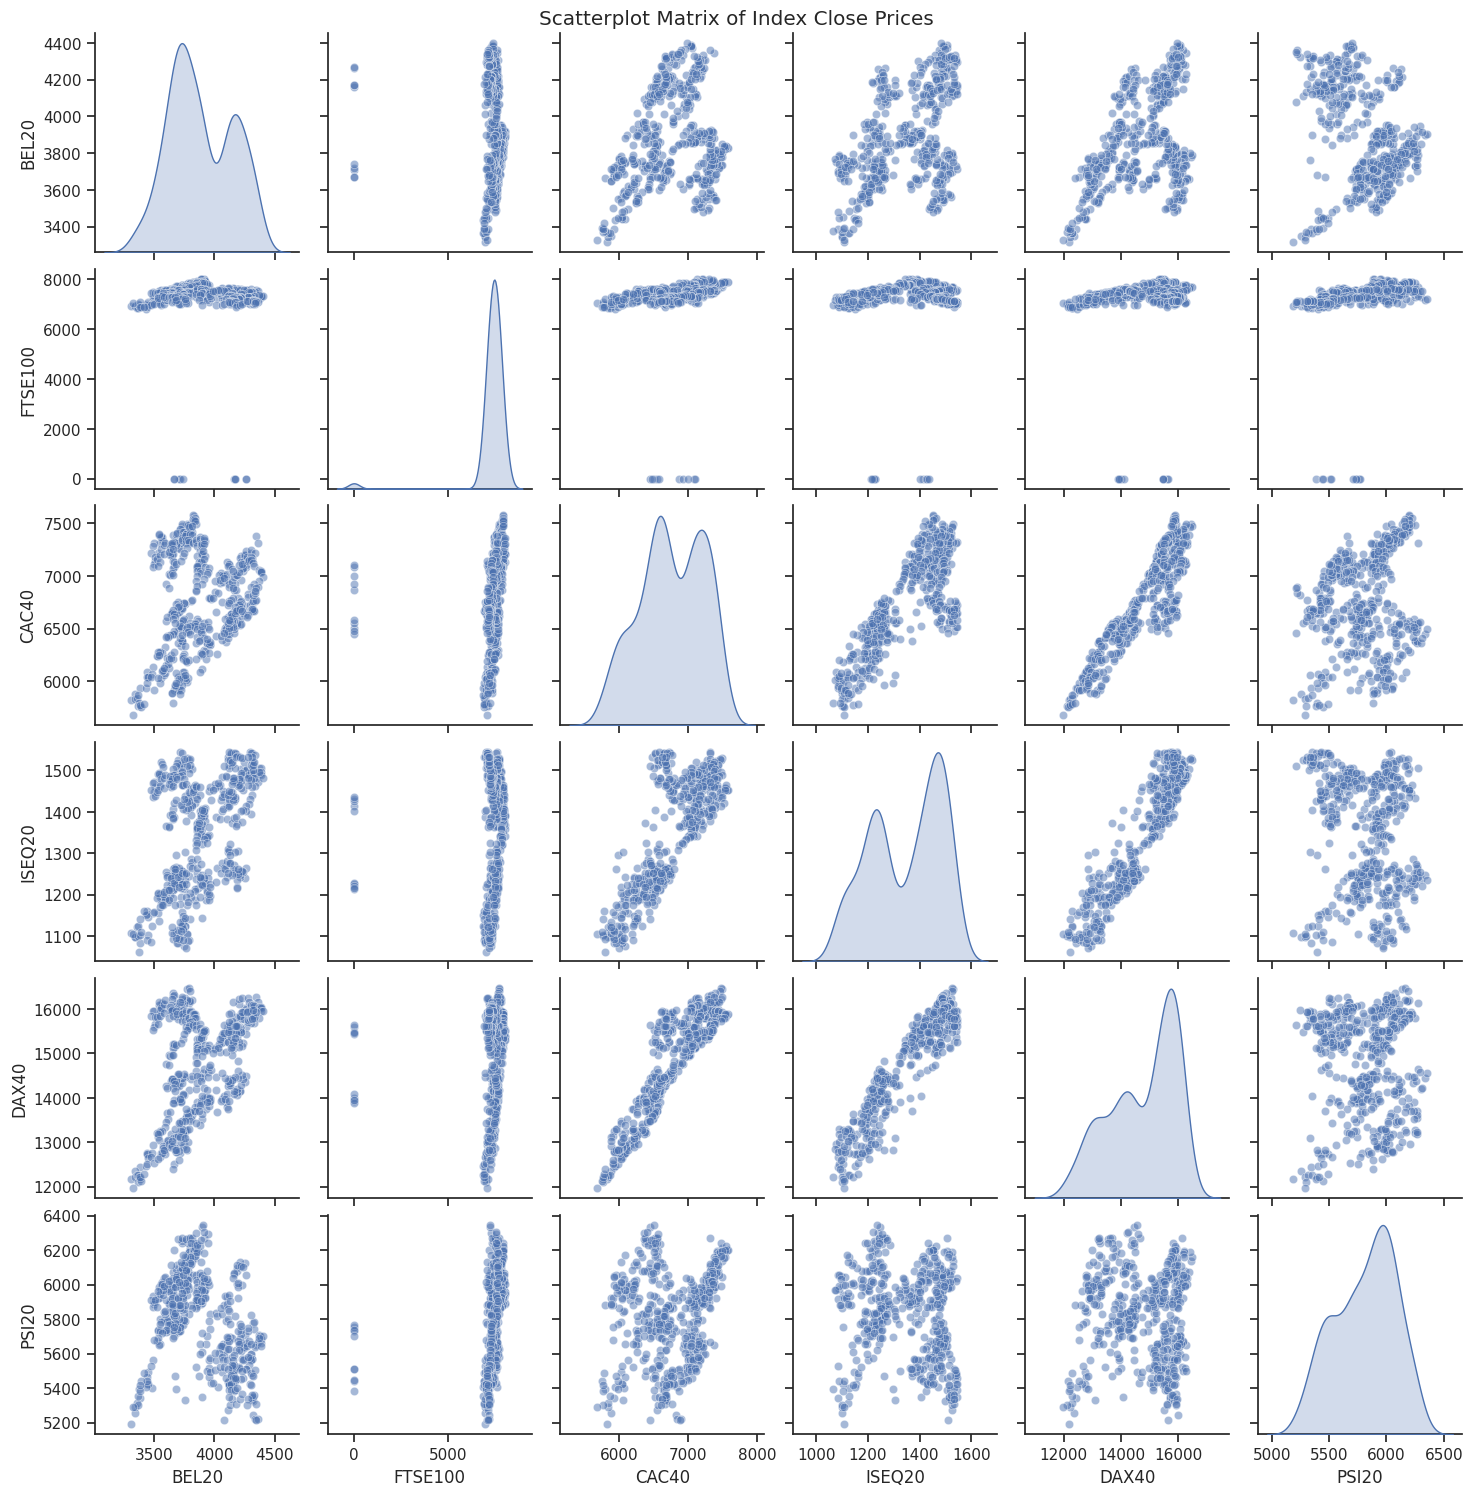

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
file_paths = ["BEL20_2years.xlsx", "FTSE100_2years.xlsx", "CAC40_2years.xlsx",
              "ISEQ20_2years.xlsx", "DAX40_2years.xlsx", "PSI20_2years.xlsx"]

dfs = []
for file_path in file_paths:
    data = pd.read_excel(file_path)
    close_col = data['Close']
    dfs.append(close_col)

# Concatenate 'Close' columns into a single DataFrame
combined_df = pd.concat(dfs, axis=1)
combined_df.columns = ['BEL20', 'FTSE100', 'CAC40', 'ISEQ20', 'DAX40', 'PSI20']

# Create a scatterplot matrix with different colors using Seaborn
sns.set(style="ticks")
g = sns.pairplot(combined_df, diag_kind="kde", markers="o", plot_kws={'alpha': 0.5})
g.fig.suptitle("Scatterplot Matrix of Index Close Prices", y=1)
plt.show()







In [ ]:
import pandas as pd
import plotly.express as px

# Load the datasets for CAC 40 and ISEQ 20
dax_data = pd.read_excel("DAX40_2years.xlsx")
iseq20_data = pd.read_excel("ISEQ20_2years.xlsx")

# Merge the two datasets based on the Date column
merged_data = pd.merge(dax_data, iseq20_data, on="Date", how="inner", suffixes=("_DAX40", "_ISEQ20"))

# Define a threshold for meeting points
threshold = 10  # You can adjust this value
merged_data["Price_Difference"] = abs(merged_data["Close_DAX40"] - merged_data["Close_ISEQ20"])
meeting_points = merged_data[merged_data["Price_Difference"] < threshold]

# Create the scatter plot
fig = px.scatter(
    merged_data,
    x="Close_DAX40",
    y="Close_ISEQ20",
    title="Scatter Plot: DAX 40 vs ISEQ 20",
    color="Price_Difference",
    color_continuous_scale="Viridis",  # Use a built-in color scale
    labels={"Close_DAX40": "DAX40 Close Price", "Close_ISEQ20": "ISEQ 20 Close Price"},
    hover_name="Date"
)

# Add meeting points as annotations
for index, row in meeting_points.iterrows():
    fig.add_annotation(
        x=row["Close_DAX"],
        y=row["Close_ISEQ20"],
        text="Meeting Point",
        showarrow=True,
        arrowhead=2,
        arrowcolor="red",
    )

# Customize plot appearance
fig.update_layout(
    coloraxis_colorbar=dict(title="Price Difference"),
    coloraxis_colorbar_len=0.6,
    coloraxis_colorbar_x=0.95,
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("DAX40_2years.xlsx")
iseq20_df = pd.read_excel("ISEQ20_2years.xlsx")

# Create a DataFrame with Date and Close columns for each index
dax_data = pd.DataFrame({"Date": dax_df["Date"], "Close_DAX": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "Close_ISEQ20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Calculate daily returns
merged_df["Daily_Return_DAX"] = merged_df["Close_DAX"].pct_change()
merged_df["Daily_Return_ISEQ20"] = merged_df["Close_ISEQ20"].pct_change()

# Create a new column for color based on positive/negative returns
merged_df["Color"] = np.where(merged_df["Daily_Return_DAX"] >= 0, "Positive", "Negative")

# Create the scatter plot with regression line and colored points
fig = px.scatter(merged_df, x="Daily_Return_DAX", y="Daily_Return_ISEQ20",
                 color="Color", # Use the "Color" column for coloring
                 title="Scatter Plot of Daily Returns: DAX vs ISEQ 20",
                 trendline="ols")

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Generate sample data (replace this with your actual data)
np.random.seed(42)
n_points = 100
iseq20_data = np.random.randn(n_points)
dax_data = 0.96 * iseq20_data + 0.04 * np.random.randn(n_points)

# Create a pandas DataFrame
data = pd.DataFrame({'Date': pd.date_range(start='2021-08-11', periods=n_points, freq='D'),
                     'ISEQ20': iseq20_data,
                     'DAX': dax_data})

# Melt the DataFrame for stacked area chart
melted_data = data.melt(id_vars=['Date'], value_vars=['ISEQ20', 'DAX'],
                        var_name='Index', value_name='Value')

# Create a stacked area chart using Plotly Express
fig = px.area(melted_data, x='Date', y='Value', color='Index',
              title='Stacked Area Chart')

# Show the plot
fig.show()

# Prophet model compared to other algoritmns

In [ ]:
pip install torch==2.0.1

In [ ]:
!pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 889.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 882.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Replace 'ISEQ 20_historical_price.xls' with the correct path to your Excel file if it's in a different directory
file_path = 'ISEQ20_2years.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame to check if the data has been imported correctly
print(df)

          Date         Open         High          Low        Close  \
0   2023-08-11  1510.949951  1511.479980  1490.829956  1492.770020   
1   2023-08-10  1508.949951  1520.540039  1508.949951  1515.689941   
2   2023-08-09  1523.130005  1526.469971  1501.680054  1502.880005   
3   2023-08-08  1533.640015  1539.560059  1517.709961  1525.839966   
4   2023-08-07  1532.199951  1545.079956  1529.380005  1544.750000   
..         ...          ...          ...          ...          ...   
505 2021-08-18  1514.510010  1524.739990  1512.689941  1522.739990   
506 2021-08-17  1513.750000  1519.270020  1509.890015  1512.750000   
507 2021-08-16  1522.280029  1526.489990  1514.290039  1520.479980   
508 2021-08-13  1532.209961  1536.280029  1531.000000  1533.250000   
509 2021-08-12  1541.989990  1544.050049  1532.739990  1532.739990   

       Adj Close    Volume  
0    1492.770020  11716400  
1    1515.689941   9590600  
2    1502.880005   8318700  
3    1525.839966  10897800  
4    1544.7500

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from neuralprophet import NeuralProphet
from prophet import Prophet
from arch import arch_model

# Replace the following line with the actual path to your Excel file
file_path = 'ISEQ20_2years.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Keep only 'Date' and 'Close' columns and rename them to 'ds' and 'y'
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Sort the data based on 'Date' column
df.sort_values('ds', inplace=True)

# Function to calculate performance metrics for each algorithm
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = mean_squared_error(actual, forecast, squared=False)
    mape = mean_absolute_percentage_error(actual, forecast)
    r2 = r2_score(actual, forecast)
    return mae, mse, rmse, mape, r2

# ARIMA
def run_arima():
    model = ARIMA(df['y'], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# SARIMA
def run_sarima():
    model = SARIMAX(df['y'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# LSTM
def run_lstm():
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df['y'].values.reshape(-1, 1))

    # Create sequences and labels
    sequence_length = 10
    sequences = []
    labels = []
    for i in range(len(scaled_data) - sequence_length):
        sequences.append(scaled_data[i:i+sequence_length])
        labels.append(scaled_data[i+sequence_length])
    sequences, labels = np.array(sequences), np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=5)

    # Make predictions
    lstm_forecast = []
    last_sequence = X_train[-1].reshape(1, sequence_length, 1)
    for i in range(len(X_test)):
        next_pred = model.predict(last_sequence)
        lstm_forecast.append(next_pred[0, 0])
        last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

    lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten()
    return lstm_forecast

# Neural Prophet
def run_neural_prophet():
    model = NeuralProphet()
    model.fit(df, freq='D')
    future = model.make_future_dataframe(df, periods=len(df))
    forecast = model.predict(future)['yhat1'].tail(len(df))
    return forecast

# Prophet
def run_prophet():
    model = Prophet()
    df_prophet = df.rename(columns={'ds': 'ds', 'y': 'y'})
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=len(df))
    forecast = model.predict(future)
    return forecast['yhat'].tail(len(df))

# GARCH
def run_garch():
    model = arch_model(df['y'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    forecast = np.sqrt(model_fit.conditional_volatility.tail(len(df)))
    return forecast

# Run each algorithm and calculate metrics
arima_forecast = run_arima()
sarima_forecast = run_sarima()
lstm_forecast = run_lstm()
neural_prophet_forecast = run_neural_prophet()
prophet_forecast = run_prophet()
garch_forecast = run_garch()

# Calculate performance metrics
actual = df['y']
arima_metrics = calculate_metrics(actual, arima_forecast)
sarima_metrics = calculate_metrics(actual, sarima_forecast)
lstm_metrics = calculate_metrics(actual[-len(lstm_forecast):], lstm_forecast)
neural_prophet_metrics = calculate_metrics(actual, neural_prophet_forecast)
prophet_metrics = calculate_metrics(actual, prophet_forecast)
garch_metrics = calculate_metrics(actual, garch_forecast)

# Create a comparison table
comparison_table = pd.DataFrame({
    'Algorithm': ['ARIMA', 'SARIMA', 'LSTM', 'NeuralProphet', 'Prophet', 'GARCH'],
    'MAE': [arima_metrics[0], sarima_metrics[0], lstm_metrics[0], neural_prophet_metrics[0], prophet_metrics[0], garch_metrics[0]],
    'MSE': [arima_metrics[1], sarima_metrics[1], lstm_metrics[1], neural_prophet_metrics[1], prophet_metrics[1], garch_metrics[1]],
    'RMSE': [arima_metrics[2], sarima_metrics[2], lstm_metrics[2], neural_prophet_metrics[2], prophet_metrics[2], garch_metrics[2]],
    'MAPE': [arima_metrics[3], sarima_metrics[3], lstm_metrics[3], neural_prophet_metrics[3], prophet_metrics[3], garch_metrics[3]],
    'R2': [arima_metrics[4], sarima_metrics[4], lstm_metrics[4], neural_prophet_metrics[4], prophet_metrics[4], garch_metrics[4]]
})

print(comparison_table)


/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning:

Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



An unsupported index was provided and will be ignored when e.g. forecasting.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecastin

Epoch 1/5
400/400 [==============================] - 18s 19ms/step - loss: 0.0123
Epoch 2/5
400/400 [==============================] - 6s 15ms/step - loss: 0.0071
Epoch 3/5
400/400 [==============================] - 9s 22ms/step - loss: 0.0054
Epoch 4/5
400/400 [==============================] - 9s 22ms/step - loss: 0.0048
Epoch 5/5
1/1 [==============================] - 0s 23ms/step


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.235% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.235% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_s

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.235% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.235% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.804% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.804% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.804% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.804% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 32it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48cpon4w/8rinljbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48cpon4w/499aau7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50879', 'data', 'file=/tmp/tmp48cpon4w/8rinljbi.json', 'init=/tmp/tmp48cpon4w/499aau7r.json', 'output', 'file=/tmp/tmp48cpon4w/prophet_model9yv1l9kd/prophet_model-20230816051323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:13:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:13:

       Algorithm          MAE           MSE         RMSE      MAPE          R2
0          ARIMA   155.614542  4.096778e+04   202.404987  0.127083   -1.190014
1         SARIMA   145.241485  3.663509e+04   191.402952  0.118849   -0.958402
2           LSTM   378.227981  1.614544e+05   401.813848  0.255899 -105.789465
3  NeuralProphet   390.074507  1.923384e+05   438.564039  0.297708   -9.281832
4        Prophet   378.895012  1.768666e+05   420.555163  0.295648   -8.454758
5          GARCH  1335.539870  1.803733e+06  1343.031256  0.991591  -95.422130


In [ ]:
# Plotting function
def plot_forecast_plotly(algorithm_name, actual, forecast):
    fig = px.line()
    fig.add_scatter(x=actual.index, y=actual['y'], name='Actual', mode='lines', line=dict(color='blue'))
    fig.add_scatter(x=actual.index, y=forecast, name=algorithm_name + ' Forecast', mode='lines', line=dict(color='orange'))
    fig.update_layout(title=algorithm_name + ' Forecast vs Actual',
                      xaxis_title='Date',
                      yaxis_title='Price')
    fig.show()


# Plot forecasts for each algorithm using Plotly
plot_forecast_plotly('ARIMA', df, arima_forecast)
plot_forecast_plotly('SARIMA', df, sarima_forecast)
plot_forecast_plotly('LSTM', df[-len(lstm_forecast):], lstm_forecast)
plot_forecast_plotly('NeuralProphet', df, neural_prophet_forecast)
plot_forecast_plotly('Prophet', df, prophet_forecast)
plot_forecast_plotly('GARCH', df, garch_forecast)

### **Anomaly detection**

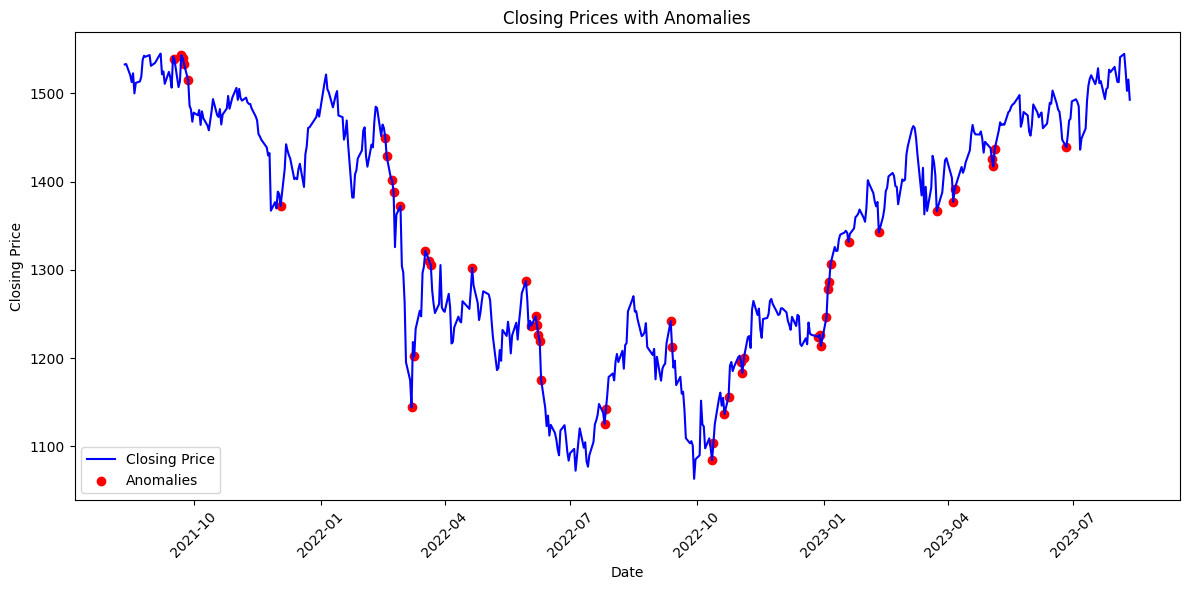

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_excel("ISEQ20_2years.xlsx")

# Calculate Z-scores for closing prices
df['Z_score'] = (df['Close'] - df['Close'].rolling(window=30).mean()) / df['Close'].rolling(window=30).std()

# Define a threshold for anomaly detection
threshold = 2  # Adjust as needed

# Identify anomalies based on the Z-score threshold
df['Anomaly'] = np.where(df['Z_score'].abs() > threshold, True, False)

# Plot the closing prices with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.scatter(df[df['Anomaly']]['Date'], df[df['Anomaly']]['Close'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices with Anomalies')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from prophet import Prophet

# Load the dataset
data = pd.read_excel("ISEQ20_2years.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
data['residual'] = data['y'] - forecast['yhat']

# Calculate the standard deviation of residuals
residual_std = data['residual'].std()

# Define a threshold for anomaly detection
threshold = 2.5

# Identify anomalies
data['anomaly'] = np.abs(data['residual']) > threshold * residual_std

# Create interactive plots using Plotly
fig = go.Figure()

# Actual and predicted close prices
fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['y'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig.update_layout(title='Actual vs. Predicted Close Prices with Anomalies',
                  xaxis_title='Date', yaxis_title='Close Price')
fig.show()

# Residuals and anomalies
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data['ds'], y=data['residual'], mode='lines', name='Residuals'))
fig2.add_trace(go.Scatter(x=data['ds'], y=[threshold * residual_std] * len(data), mode='lines', name='Anomaly Threshold', line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data['ds'], y=[-threshold * residual_std] * len(data), mode='lines', showlegend=False, line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['residual'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig2.update_layout(title='Residuals and Anomalies',
                   xaxis_title='Date', yaxis_title='Residual',
                   shapes=[{'type': 'line', 'x0': data['ds'].iloc[0], 'x1': data['ds'].iloc[-1], 'y0': threshold * residual_std, 'y1': threshold * residual_std,
                            'line': {'color': 'red', 'width': 2, 'dash': 'dash'}}])
fig2.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiffmt75g/691ie5bf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiffmt75g/dkbdbelx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17005', 'data', 'file=/tmp/tmpiffmt75g/691ie5bf.json', 'init=/tmp/tmpiffmt75g/dkbdbelx.json', 'output', 'file=/tmp/tmpiffmt75g/prophet_modely594jfdr/prophet_model-20230817061337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:13:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:13:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# comparision with other models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from neuralprophet import NeuralProphet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_excel("ISEQ20_2years.xlsx")

# Prepare data for other models
X = df[['Close']].values  # Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create binary labels for anomaly detection
y = np.zeros(X_scaled.shape[0])  # 0 for normal data points
y[:10] = 1  # Label first 10 data points as anomalies for demonstration

# Implement and evaluate each model
models = [
    ('NeuralProphet', NeuralProphet()),
    ('Isolation Forest', IsolationForest(contamination=0.05)),
    ('One-Class SVM', OneClassSVM(nu=0.05))
]

results = []

for model_name, model in models:
    if model_name == 'NeuralProphet':
        model_data = df[['Date', 'Close']].copy()
        model_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
        model.fit(model_data, freq='D')
        forecast = model.predict(model_data)
        y_score = forecast['yhat1'].values
    else:
        model.fit(X_scaled)
        if model_name == 'Isolation Forest':
            y_score = -model.decision_function(X_scaled)  # Reverse decision function for anomaly score
        elif model_name == 'One-Class SVM':
            y_score = -model.decision_function(X_scaled)  # Reverse decision function for anomaly score

    # Calculate precision-recall curve and AUC-PR
    precision, recall, _ = precision_recall_curve(y, y_score)
    auc_pr = auc(recall, precision)

    # Calculate other performance metrics (Precision, Recall, F1-score)
    y_pred = (y_score < 0).astype(int)
    precision_val = precision_score(y, y_pred)
    recall_val = recall_score(y, y_pred)
    f1_val = f1_score(y, y_pred)

    results.append([model_name, precision_val, recall_val, f1_val, auc_pr])

# Create a comparison table
columns = ['Model', 'Precision', 'Recall', 'F1-score', 'AUC-PR']
comparison_table = pd.DataFrame(results, columns=columns)
print(comparison_table)


/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.235% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.235% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting nor

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

In [ ]:
pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 585.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=d74bd7272551eb3ea56a456fb36f1fe339d354fdfd900e08b2adb542b0d386da
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [ ]:
pip install NeuralProphet

  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)
  Attempting uninstall: holidays
    Found existing installation: holidays 0.30
    Uninstalling holidays-0.30:
      Successfully uninstalled holidays-0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.4 requires holidays>=0.25, but you have holidays 0.21.13 which is incompatible.


In [ ]:
pip install holidays==0.21.13


  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)
  Attempting uninstall: holidays
    Found existing installation: holidays 0.30
    Uninstalling holidays-0.30:
      Successfully uninstalled holidays-0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 0.6.2 requires torch<2.0.0,>=1.13.1, but you have torch 2.0.1 which is incompatible.
prophet 1.1.4 requires holidays>=0.25, but you have holidays 0.21.13 which is incompatible.


In [ ]:
!pip install torch==2.0.1




In [ ]:
!pip install --upgrade pip



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install --upgrade prophet torchaudio torchdata torchtext torchvision


  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/97/43/303bc017c708734bd8a7a75b2130ebf1d582320d732174d6e359ea163b4b/holidays-0.30-py3-none-any.whl.metadata
  Using cached holidays-0.30-py3-none-any.whl.metadata (16 kB)
Using cached holidays-0.30-py3-none-any.whl (736 kB)
  Attempting uninstall: holidays
    Found existing installation: holidays 0.21.13
    Uninstalling holidays-0.21.13:
      Successfully uninstalled holidays-0.21.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 0.6.2 requires holidays<0.22,>=0.21, but you have holidays 0.30 which is incompatible.
neuralprophet 0.6.2 requires torch<2.0.0,>=1.13.1, but you have torch 2.0.1 which is incompatible.


In [ ]:
pip uninstall torchvision


Found existing installation: torchvision 0.15.2+cu118
Uninstalling torchvision-0.15.2+cu118:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchvision-0.15.2+cu118.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libcudart.60cfec8e.so.11.0
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libnvjpeg.70530407.so.11
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libpng16.7f72a3c5.so.16
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libz.e3d3156c.so.1
    /usr/local/lib/python3.10/dist-packages/torchvision/*
Proceed (Y/n)? 

In [ ]:
pip install torchvision==0.10.0+cu110  # or another version that matches CUDA 11.7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from neuralprophet import NeuralProphet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pyod.models.auto_encoder import AutoEncoder

# Read the dataset
df = pd.read_excel("ISEQ20_2years.xlsx")

# Prepare data for other models
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values  # Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create binary labels for anomaly detection
y = np.zeros(X_scaled.shape[0])  # 0 for normal data points
y[:10] = 1  # Label first 10 data points as anomalies for demonstration

# Implement and evaluate each model
models = [
    ('Prophet', Prophet()),  # Add Prophet model here
    ('NeuralProphet', NeuralProphet()),
    ('Isolation Forest', IsolationForest(contamination=0.05)),
    ('One-Class SVM', OneClassSVM(nu=0.05)),
    ('LSTM', Sequential([
        LSTM(50, activation='relu', input_shape=(X_scaled.shape[1], 1)),
        Dense(1)
    ])),
    ('Autoencoder', AutoEncoder(hidden_neurons=[8, 4, 8]))  # Add Autoencoder model here
]

results = []

for model_name, model in models:
    if model_name == 'Prophet':
        model_data = df[['Date', 'Close']].copy()
        model_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
        model.fit(model_data)
        forecast = model.predict(model_data)
        y_score = forecast['yhat'].values
    elif model_name == 'NeuralProphet':
        model_data = df[['Date', 'Close']].copy()
        model_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
        model.fit(model_data, freq='D')
        forecast = model.predict(model_data)
        y_score = forecast['yhat1'].values
    elif model_name == 'LSTM':
        X_lstm = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_lstm, y, epochs=10, batch_size=32, verbose=0)
        y_score = model.predict(X_lstm).flatten()
    else:
        model.fit(X_scaled)
        if model_name == 'Isolation Forest':
            y_score = -model.decision_function(X_scaled)  # Reverse decision function for anomaly score
        elif model_name == 'One-Class SVM':
            y_score = -model.decision_function(X_scaled)  # Reverse decision function for anomaly score
        elif model_name == 'Autoencoder':
            model.fit(X_scaled)
            y_score = model.decision_function(X_scaled)  # Anomaly scores from Autoencoder

    # Calculate precision-recall curve and AUC-PR
    precision, recall, _ = precision_recall_curve(y, y_score)
    auc_pr = auc(recall, precision)

    # Calculate other performance metrics (Precision, Recall, F1-score)
    y_pred = (y_score < 0).astype(int)
    precision_val = precision_score(y, y_pred)
    recall_val = recall_score(y, y_pred)
    f1_val = f1_score(y, y_pred)

    results.append([model_name, precision_val, recall_val, f1_val, auc_pr])

# Create a comparison table
columns = ['Model', 'Precision', 'Recall', 'F1-score', 'AUC-PR']
comparison_table = pd.DataFrame(results, columns=columns)
print(comparison_table)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from neuralprophet import NeuralProphet
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pyod.models.auto_encoder import AutoEncoder
from prophet import Prophet  # Import Prophet from the "prophet" package

# Read the dataset
df = pd.read_excel("ISEQ20_2years.xlsx")

# Prepare data for other models
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values  # Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create binary labels for anomaly detection
y = np.zeros(X_scaled.shape[0])  # 0 for normal data points
y[:10] = 1  # Label first 10 data points as anomalies for demonstration

# Implement and evaluate each model
models = [
    ('NeuralProphet', NeuralProphet()),
    ('Prophet', Prophet()),  # Add Prophet model
    ('Isolation Forest', IsolationForest(contamination=0.05)),
    ('One-Class SVM', OneClassSVM(nu=0.05)),
    ('LSTM', Sequential([
        LSTM(50, activation='relu', input_shape=(X_scaled.shape[1], 1)),
        Dense(1)
    ])),
    ('Autoencoder', AutoEncoder(hidden_neurons=[8, 4, 8]))
]


results = []

for model_name, model in models:
    if model_name == 'NeuralProphet':
        model_data = df[['Date', 'Close']].copy()
        model_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
        model.fit(model_data, freq='D')
        forecast = model.predict(model_data)
        y_score = forecast['yhat1'].values
    elif model_name == 'Prophet':
        model_data = df[['Date', 'Close']].copy()
        model_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
        model = Prophet()  # Initialize the Prophet model
        model.fit(model_data)
        future = model.make_future_dataframe(periods=0)  # Forecast on existing data
        forecast = model.predict(future)
        y_score = forecast['yhat'].values
    elif model_name == 'LSTM':
        X_lstm = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
        model = Sequential([
            LSTM(50, activation='relu', input_shape=(X_scaled.shape[1], 1)),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_lstm, y, epochs=10, batch_size=32, verbose=0)
        y_score = model.predict(X_lstm).flatten()
    else:
        model.fit(X_scaled)
        if model_name == 'Isolation Forest':
            y_score = -model.decision_function(X_scaled)  # Reverse decision function for anomaly score
        elif model_name == 'One-Class SVM':
            y_score = -model.decision_function(X_scaled)  # Reverse decision function for anomaly score
        elif model_name == 'Autoencoder':
            model.fit(X_scaled)
            y_score = model.decision_function(X_scaled)  # Anomaly scores from Autoencoder

    # Calculate precision-recall curve and AUC-PR
    precision, recall, _ = precision_recall_curve(y, y_score)
    auc_pr = auc(recall, precision)

    # Calculate other performance metrics (Precision, Recall, F1-score)
    y_pred = (y_score < threshold).astype(int)  # Adjust threshold as needed
    precision_val = precision_score(y, y_pred)
    recall_val = recall_score(y, y_pred)
    f1_val = f1_score(y, y_pred)

    results.append([model_name, precision_val, recall_val, f1_val, auc_pr])

# Create a comparison table
columns = ['Model', 'Precision', 'Recall', 'F1-score', 'AUC-PR']
comparison_table = pd.DataFrame(results, columns=columns)
print(comparison_table)

RuntimeError: ignored